In [12]:
!pip install torch torchvision
!pip install d2l==1.0.0a1.post0
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import np, npx
npx.set_np()

In [14]:
def init_adam_states(feature_dim):
    v_w, v_b = np.zeros((feature_dim, 1)), np.zeros(1)
    s_w, s_b = np.zeros((feature_dim, 1)), np.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

In [15]:
def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        v[:] = beta1 * v + (1 - beta1) * p.grad
        s[:] = beta2 * s + (1 - beta2) * np.square(p.grad)
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p[:] -= hyperparams['lr'] * v_bias_corr / (np.sqrt(s_bias_corr) + eps)
    hyperparams['t'] += 1

loss: 0.243, 0.127 sec/epoch


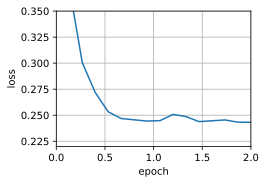

In [16]:
data_iter, feature_dim = d2l.get_data_ch11(batch_size=10)
d2l.train_ch11(adam, init_adam_states(feature_dim),
               {'lr': 0.01, 't': 1}, data_iter, feature_dim);

loss: 0.243, 0.052 sec/epoch


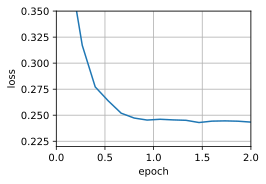

In [17]:
d2l.train_concise_ch11('adam', {'learning_rate': 0.01}, data_iter)